In [1]:
using thesis, PRMaps
using Healpix
using Plots
using Statistics
using Distributions
using LinearAlgebra

import Stripeline as Sl

# Grado di polarizzazione

In [11]:
labels = ["altitude_offset" "ground_offset" "fork" "zVAX&ω_0" "zVAX&ω_90" "zVAX&ω_180" "zVAX&ω_270"]
maps = PolarizedHealpixMap[]
for name in labels
    push!(maps, readPolarizedMapFromFITS(joinpath("maps_10days/maps",name*".fits"), 1, Float64))
end
ideal = readPolarizedMapFromFITS(joinpath("maps_10days/maps","ideal.fits"), 1, Float64)
nothing

In [89]:
maps_pol = HealpixMap[]
for map in maps
    buffer = HealpixMap{Float64, RingOrder}(map.i.resolution.nside)
    polDegreeMap!(buffer, map.i, map.q, map.u)
    
    # Deve essere positivo il grado di pol?
    # buffer.pixels = abs.(buffer.pixels)
    
    push!(maps_pol, buffer)
end

ideal_pol = HealpixMap{Float64, RingOrder}(ideal.i.resolution.nside)
polDegreeMap!(ideal_pol, ideal.i, ideal.q, ideal.u)
# ideal_pol.pixels = abs.(ideal_pol.pixels)

# Togliere outlayer
for m in maps_pol
    m.pixels[abs.(m.pixels).>1.0] .= NaN
end

ideal_pol.pixels[abs.(ideal_pol.pixels).>1.0] .= NaN
nothing

In [91]:
error_pol = HealpixMap[]
for map in maps_pol
    push!(error_pol, ideal_pol-map)
end

nothing

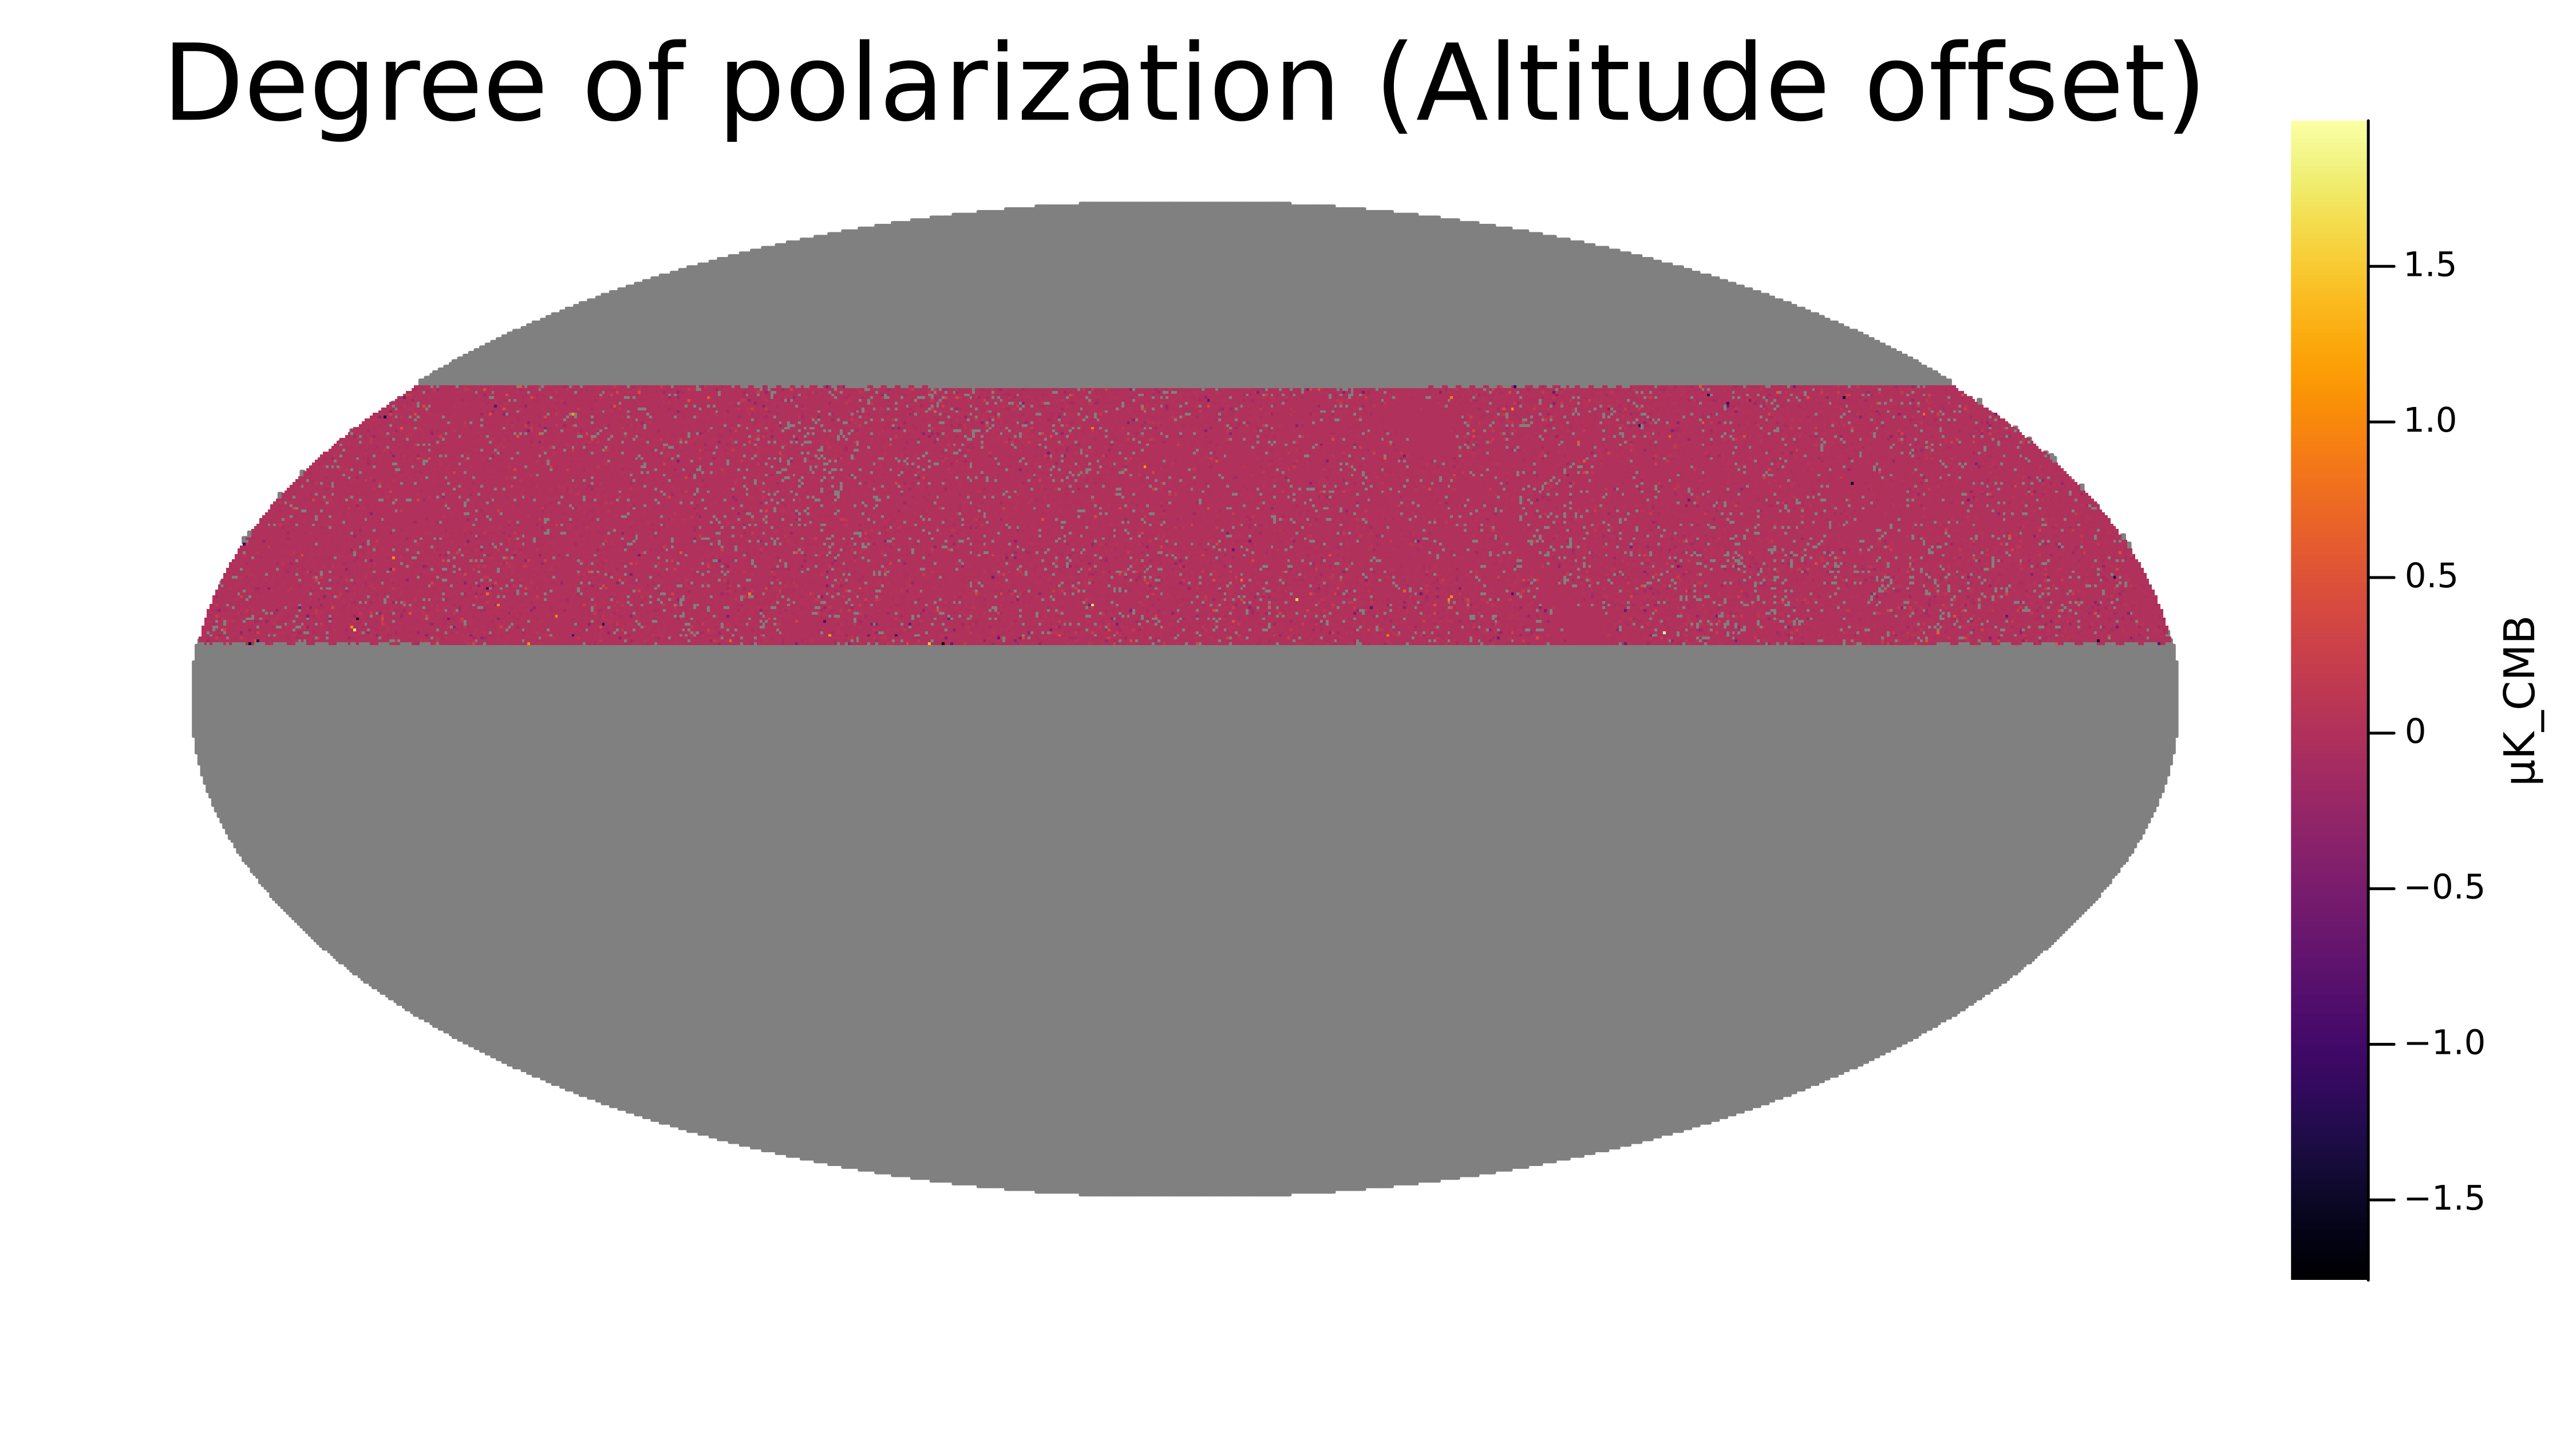

In [92]:
plot(error_pol[1], size = (900, 500), colorbar_title="μK_CMB", dpi=500, title = "Degree of polarization (Altitude offset)\n",  titlefontsize=25, topmargin=-10Plots.mm)

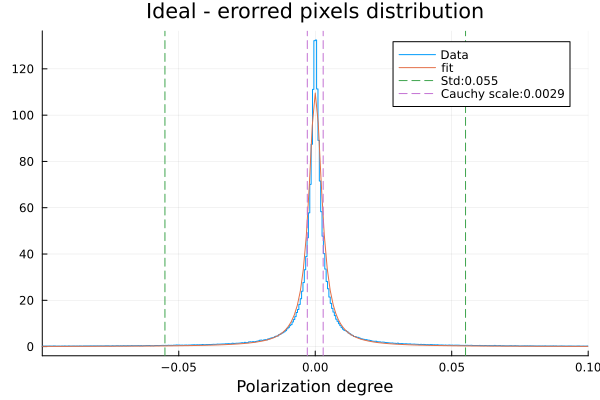

In [100]:
data = error_pol[1][isfinite.(error_pol[1])]

stephist(data, normalize = true, label="Data")

distro_fit = fit(Cauchy, data)
distro_plot = truncated(distro_fit, minimum(data), maximum(data))

plot!(distro_plot, normalize = true, label = "fit", xlim=(-0.1, 0.1), xlabel="Polarization degree")
vline!([-std(data), std(data)], label = "Std:"*string(std(data))[1:5], style=:dash)
vline!([-scale(distro_fit),scale(distro_fit)], label = "Cauchy scale:"*string(scale(distro_fit))[1:6], style=:dash)
title!("Ideal - erorred pixels distribution")
#savefig("../results/error_nature/pol_degree.pdf")

# Stessa analisi sul tipo di errore sul parametro Q

In [95]:
error_q = HealpixMap[]
for map in maps
    push!(error_q, ideal.q-map.q)
end

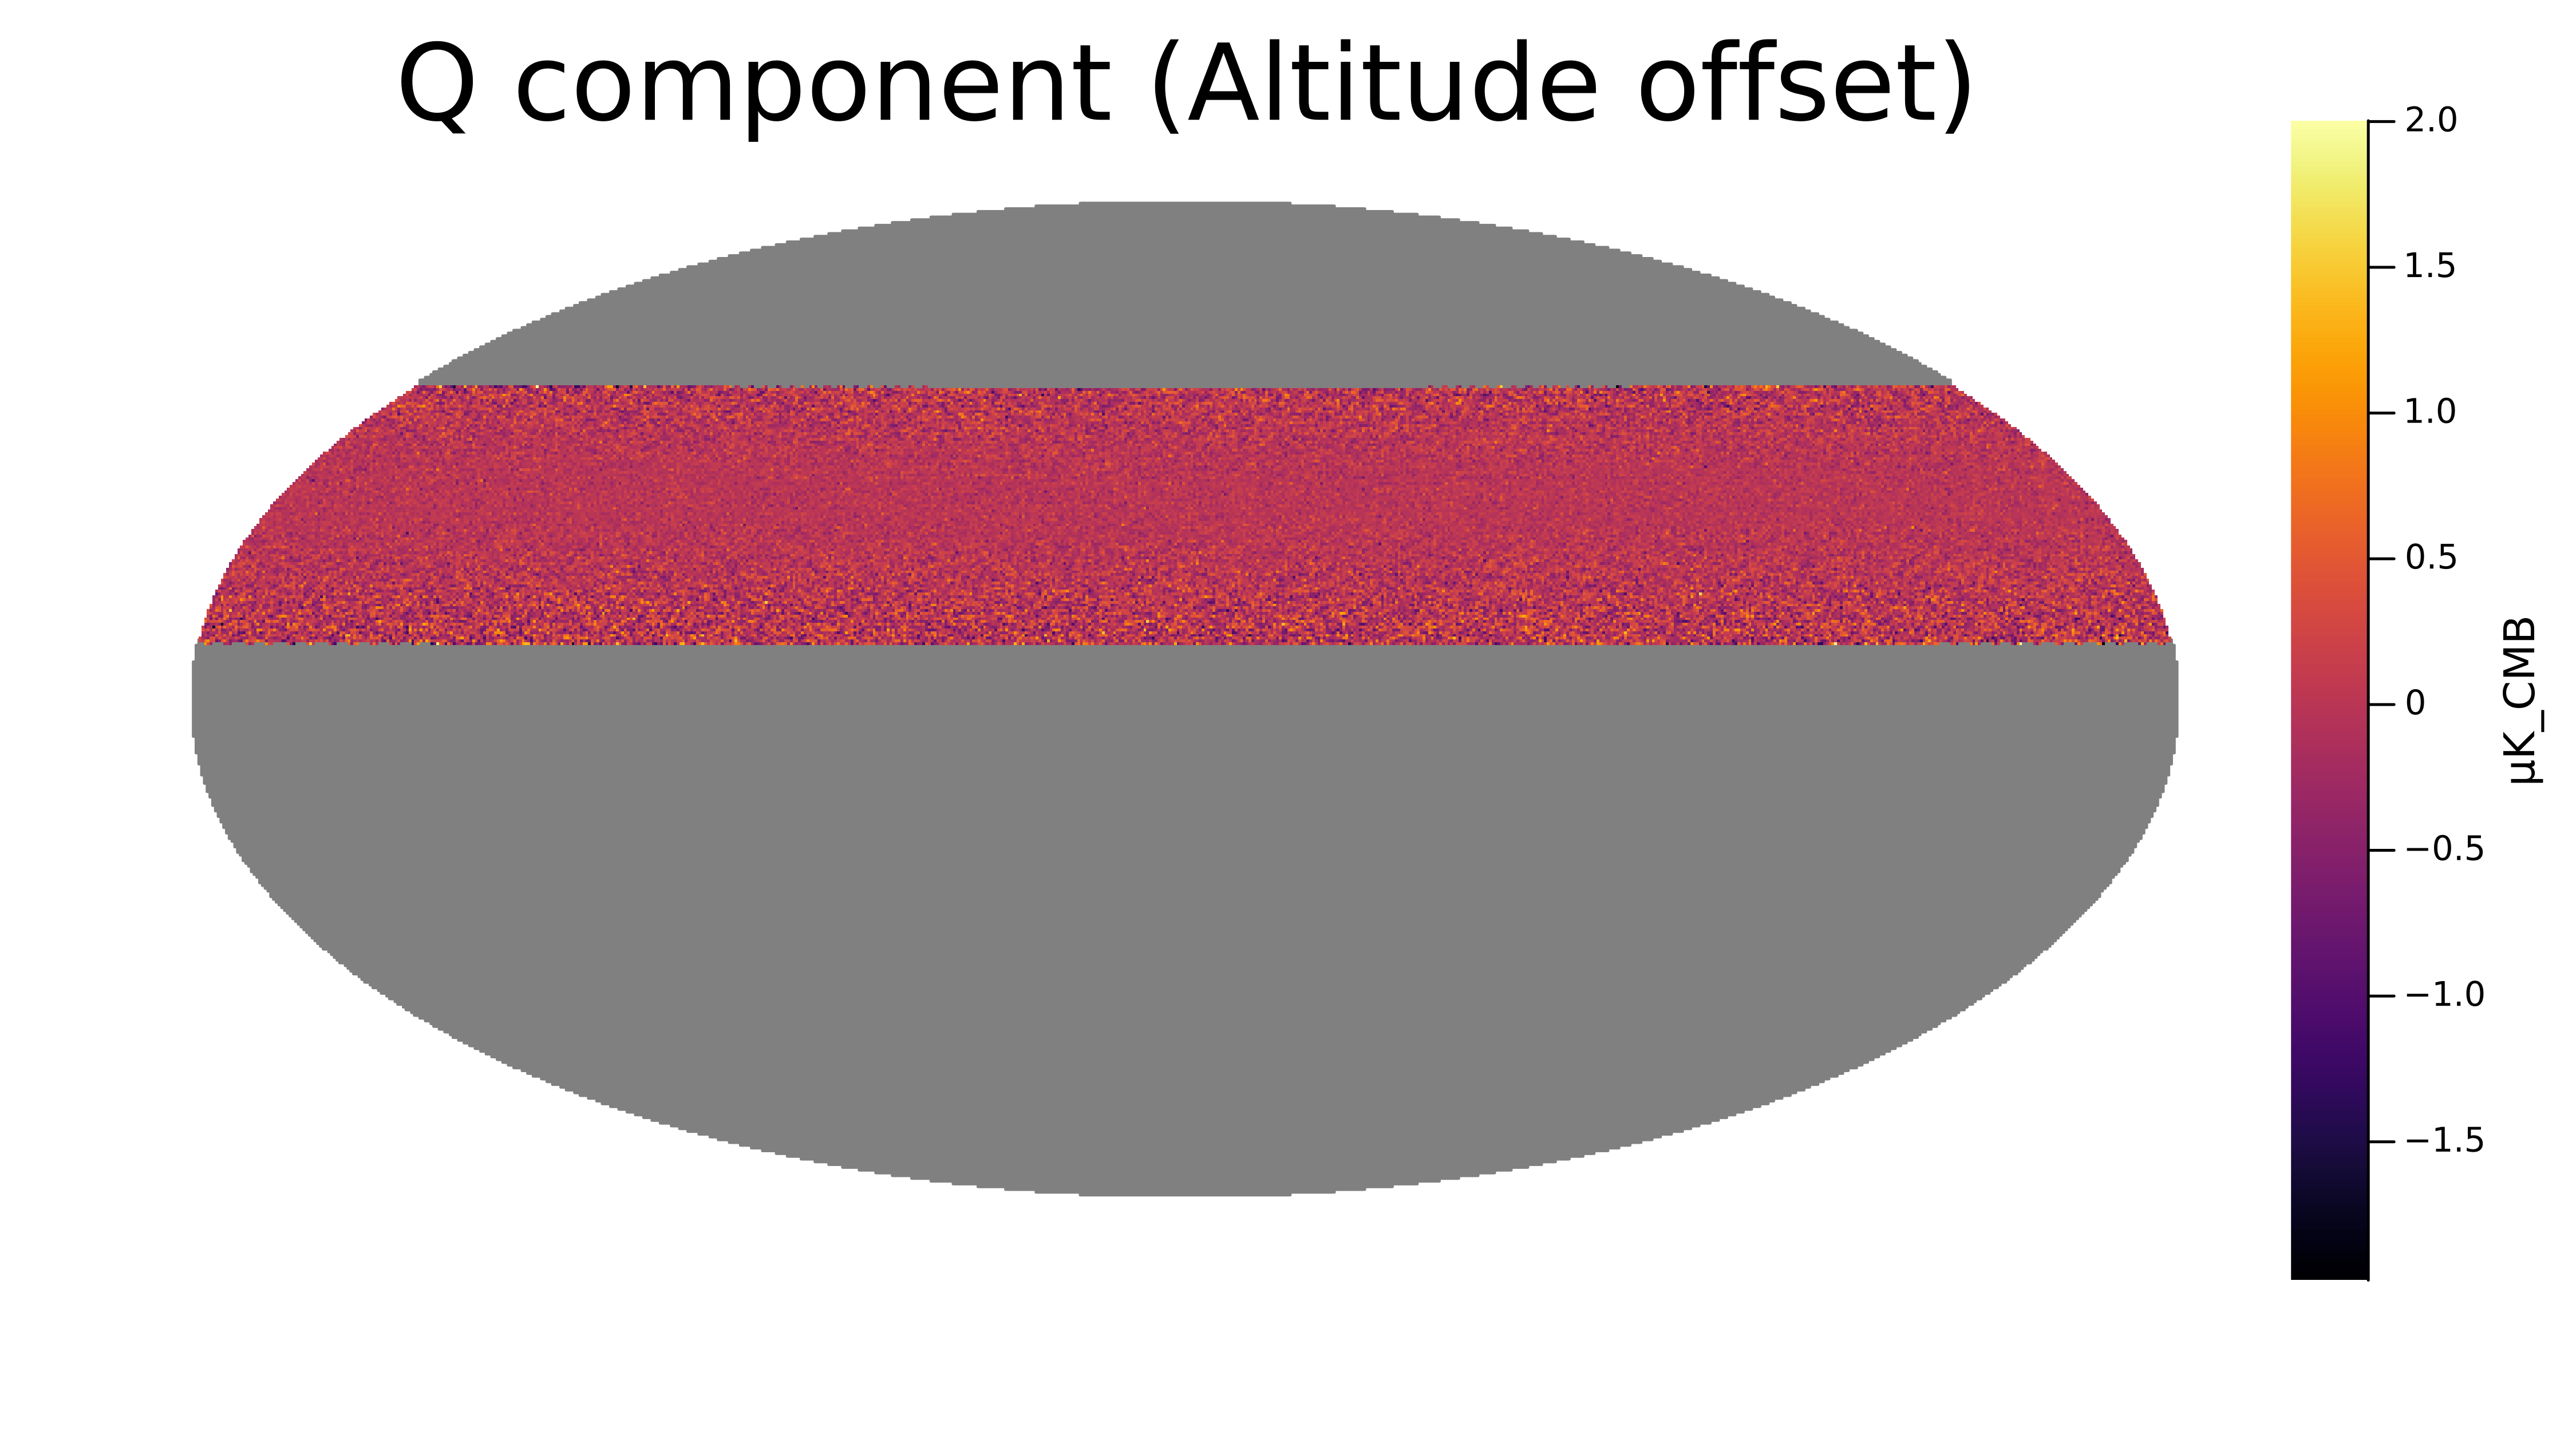

In [96]:
plot(error_q[1], size = (900, 500), colorbar_title="μK_CMB", dpi=500, title = "Q component (Altitude offset)\n",  titlefontsize=25, topmargin=-10Plots.mm)

In [101]:
data_q = error_q[1][isfinite.(error_q[1])]

stephist(data_q, normalize = true, label="Data")

distro_fit = fit(Normal, data_q)
distro_plot = truncated(distro_fit, minimum(data_q), maximum(data_q))

plot!(distro_plot, label = "fit", xlabel="Q parameter [μK_CMB]")
vline!([-std(data_q), std(data_q)], label = "Std:"*string(std(data_q))[1:5], style=:dash)
#vline!([-scale(distro_fit),scale(distro_fit)], label = "Cauchy scale", style=:dash)
title!("Ideal - erorred pixels distribution")
#savefig("../results/error_nature/q_param.pdf")

"/mnt/sda1/Università/Magistrale/Tesi/thesis/results/error_nature/q_param.pdf"